# ✈️ Exploratory Data Analysis (EDA) — Flight Delay Dataset

## 🎯 Cel
Celem analizy jest zrozumienie struktury i jakości danych o opóźnieniach lotów w USA w 2024 roku.  
Dane pochodzą z Kaggle: [Flight Delay and Cancellation Data (1 Million 2024)](https://www.kaggle.com/datasets/nalisha/flight-delay-and-cancellation-data-1-million-2024/data).

W ramach tej analizy:
- sprawdzenie rozkładu wartości i typów danych,
- wykrycie braków i wartości odstających,
- zbadanie korelacji między zmiennymi numerycznymi,
- zaproponowanie rekomendacji dla dalszego czyszczenia i modelowania

## Import bibliotek i ustawienia

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Ustawienia wyświetlania
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10,6)

# Ścieżka do danych
DATA_PATH = "../data/01_raw/dataset_flight_delay.csv"


## Wczytanie danych

In [3]:
df = pd.read_csv(DATA_PATH)
print(f"Liczba wierszy: {df.shape[0]:,}, kolumn: {df.shape[1]}")

df.head()


Liczba wierszy: 1,048,575, kolumn: 18


,year,month,day_of_month,day_of_week,fl_date,origin,origin_city_name,origin_state_nm,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,cancelled,air_time,distance,weather_delay,late_aircraft_delay
0,2024,1,1,1,1/1/2024,JFK,"New York, NY",New York,1247.0,31.0,1318.0,1442.0,7.0,0,84.0,509,0,0
1,2024,1,1,1,1/1/2024,MSP,"Minneapolis, MN",Minnesota,1001.0,20.0,1021.0,1249.0,6.0,0,88.0,622,0,0
2,2024,1,1,1,1/1/2024,JFK,"New York, NY",New York,1411.0,21.0,1432.0,1533.0,8.0,0,61.0,288,0,0
3,2024,1,1,1,1/1/2024,RIC,"Richmond, VA",Virginia,1643.0,13.0,1656.0,1747.0,12.0,0,51.0,288,0,0
4,2024,1,1,1,1/1/2024,DTW,"Detroit, MI",Michigan,1010.0,21.0,1031.0,1016.0,4.0,0,45.0,237,0,0


## Podstawowe informacje

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   year                 1048575 non-null  int64  
 1   month                1048575 non-null  int64  
 2   day_of_month         1048575 non-null  int64  
 3   day_of_week          1048575 non-null  int64  
 4   fl_date              1048575 non-null  object 
 5   origin               1048575 non-null  object 
 6   origin_city_name     1048575 non-null  object 
 7   origin_state_nm      1048575 non-null  object 
 8   dep_time             1026022 non-null  float64
 9   taxi_out             1025450 non-null  float64
 10  wheels_off           1025450 non-null  float64
 11  wheels_on            1024898 non-null  float64
 12  taxi_in              1024898 non-null  float64
 13  cancelled            1048575 non-null  int64  
 14  air_time             1022824 non-null  float64
 15

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,1048575.0,NaN,NaN,NaN,2024.0,0.0,2024.0,2024.0,2024.0,2024.0,2024.0
month,1048575.0,NaN,NaN,NaN,1.478081,0.49952,1.0,1.0,1.0,2.0,2.0
day_of_month,1048575.0,NaN,NaN,NaN,15.30512,8.585503,1.0,8.0,15.0,23.0,31.0
day_of_week,1048575.0,NaN,NaN,NaN,3.893483,2.010038,1.0,2.0,4.0,6.0,7.0
fl_date,1048575,60,2/23/2024,19175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
origin,1048575,334,ATL,50297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
origin_city_name,1048575,328,"Atlanta, GA",50297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
origin_state_nm,1048575,52,Texas,110559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dep_time,1026022.0,NaN,NaN,NaN,1325.073671,497.299032,1.0,911.0,1323.0,1736.0,2400.0
taxi_out,1025450.0,NaN,NaN,NaN,18.250121,10.440251,1.0,12.0,15.0,21.0,213.0


## Braki danych

In [6]:
missing = df.isna().sum()
missing_pct = (missing / len(df) * 100).sort_values(ascending=False)
missing_df = pd.DataFrame({'missing_values': missing, 'missing_%': missing_pct})
missing_df[missing_df['missing_values'] > 0]

,missing_values,missing_%
air_time,25751,2.455809
dep_time,22553,2.150824
taxi_in,23677,2.258017
taxi_out,23125,2.205374
wheels_off,23125,2.205374
wheels_on,23677,2.258017


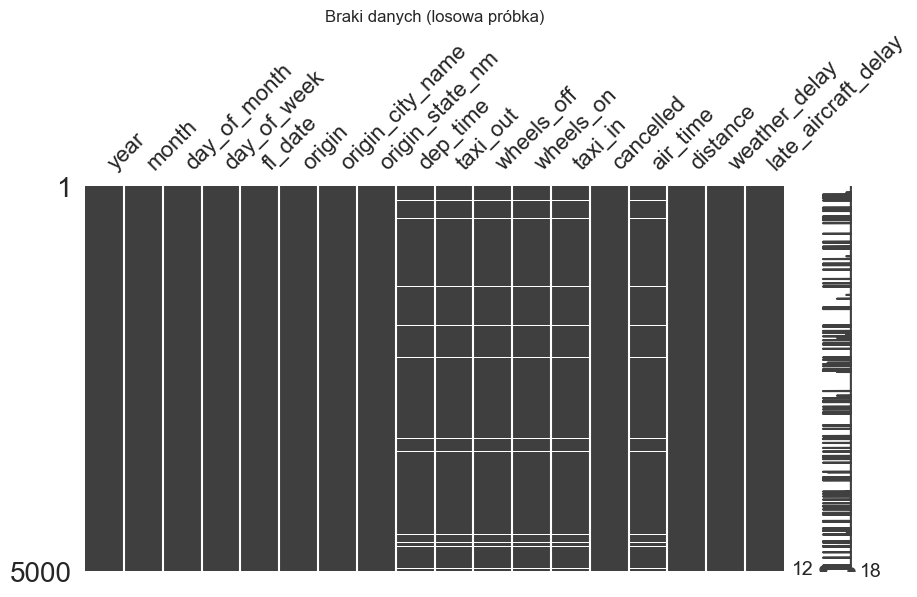

In [8]:
msno.matrix(df.sample(n=min(5000, len(df))), figsize=(10,5))
plt.title("Braki danych (losowa próbka)")
plt.savefig("../docs/missing_matrix.png", bbox_inches="tight")
plt.show()

## Analiza zmiennych numerycznych

In [9]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
numeric_cols

Index(['year', 'month', 'day_of_month', 'day_of_week', 'dep_time', 'taxi_out',
       'wheels_off', 'wheels_on', 'taxi_in', 'cancelled', 'air_time',
       'distance', 'weather_delay', 'late_aircraft_delay'],
      dtype='object')

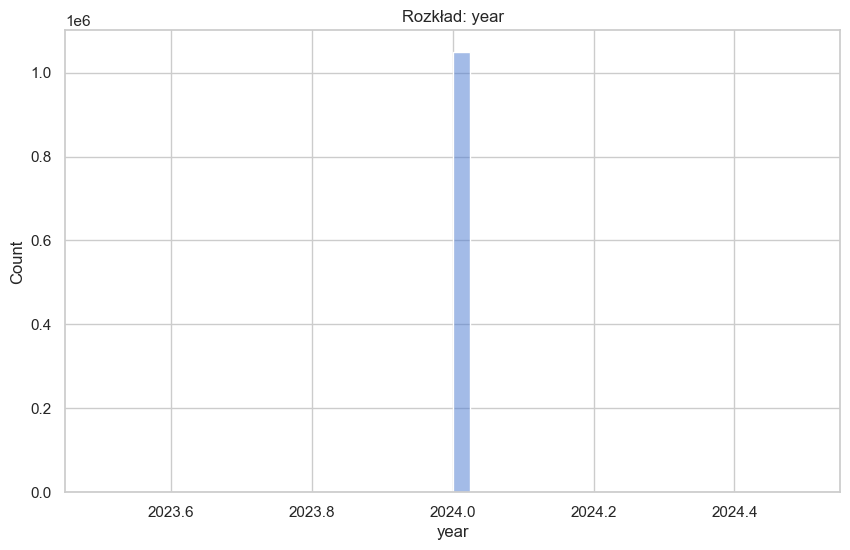

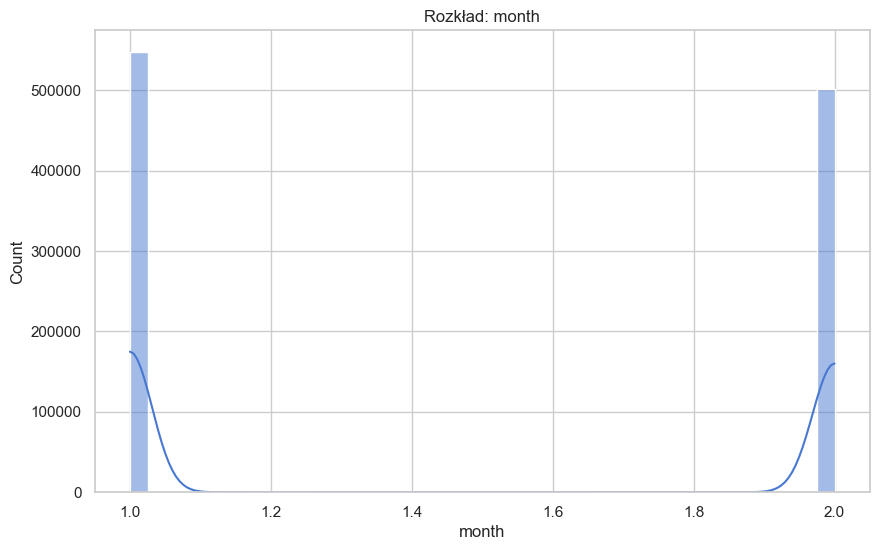

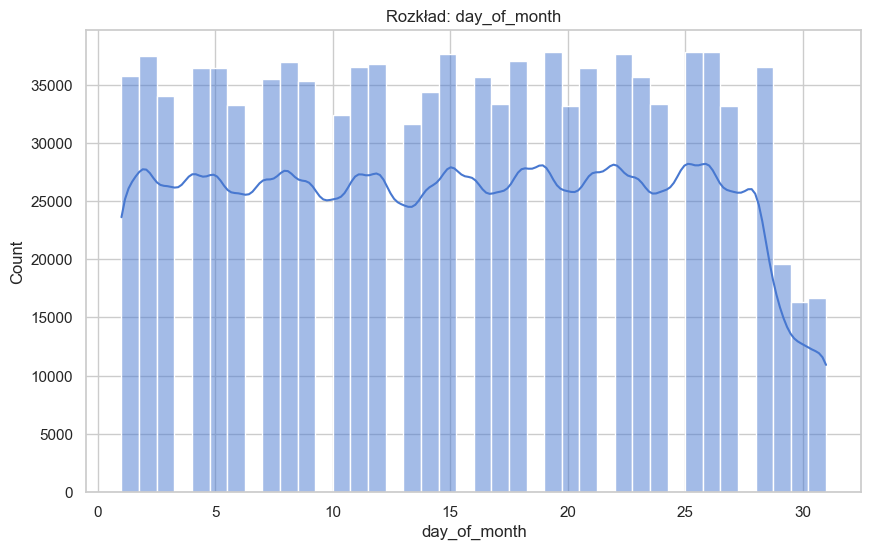

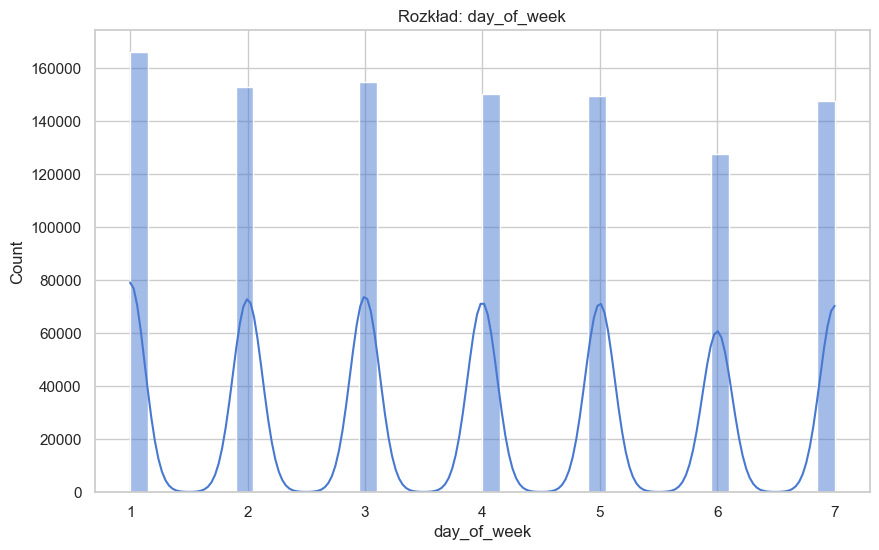

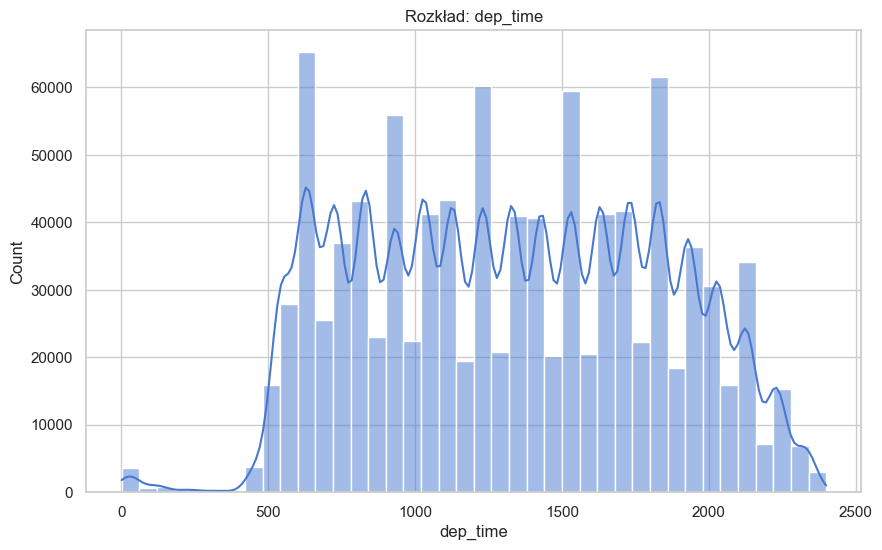

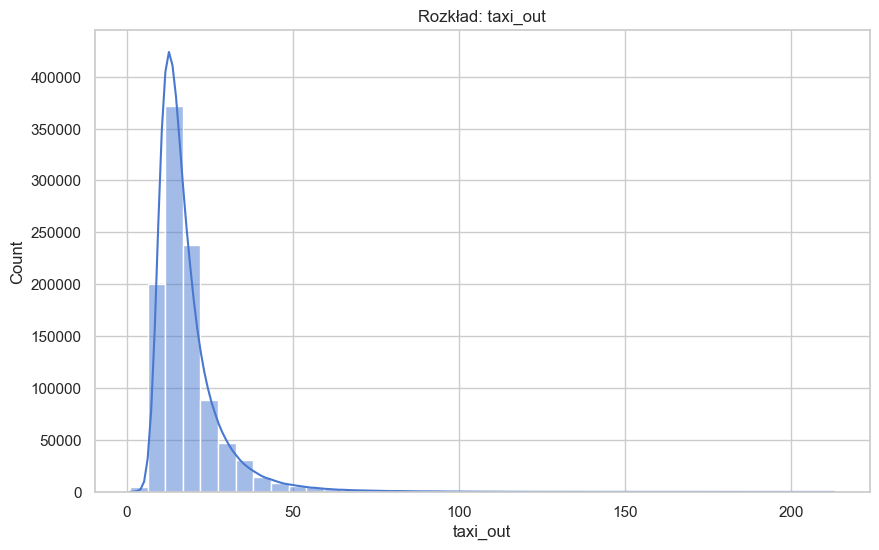

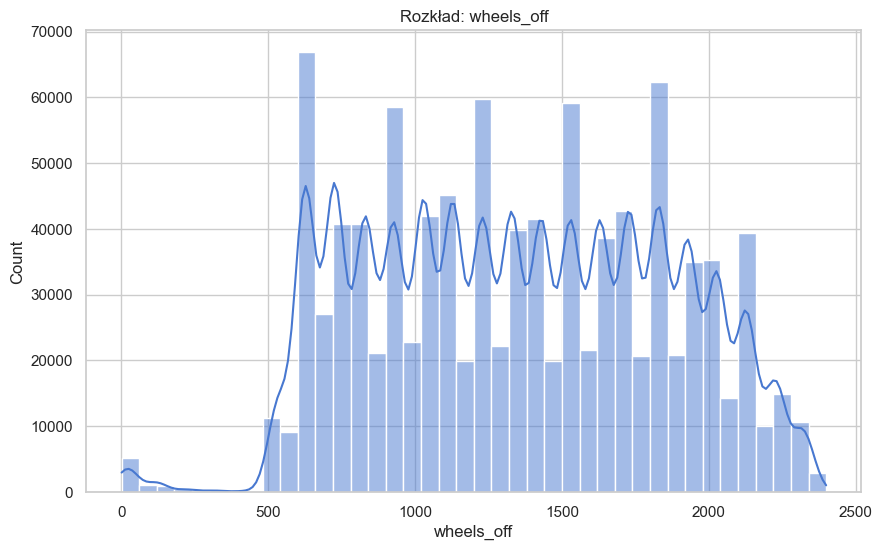

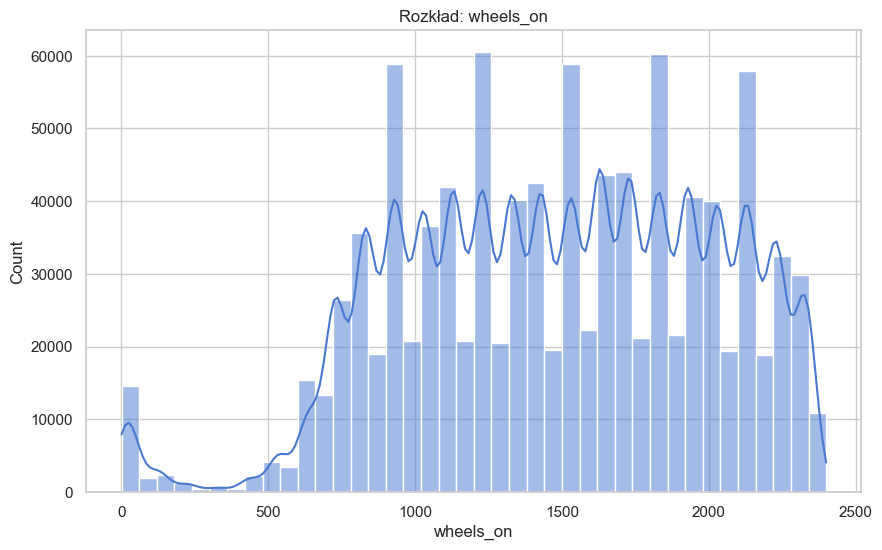

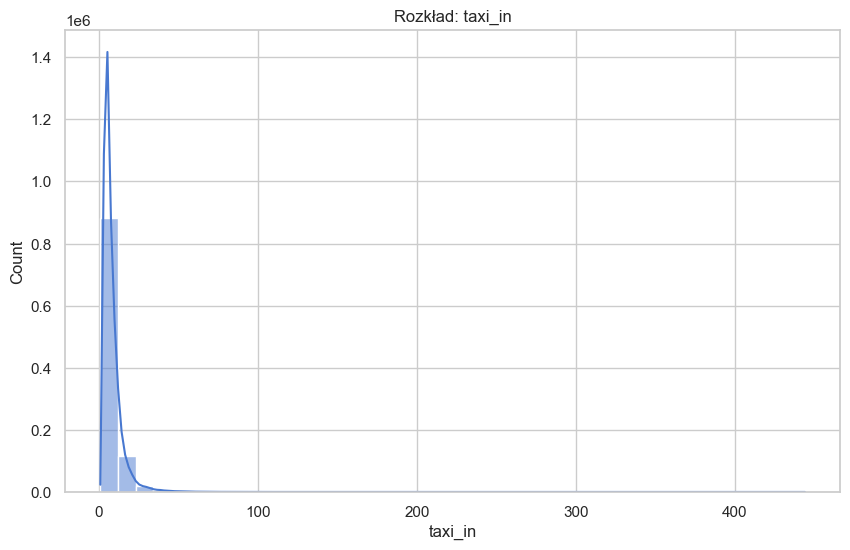

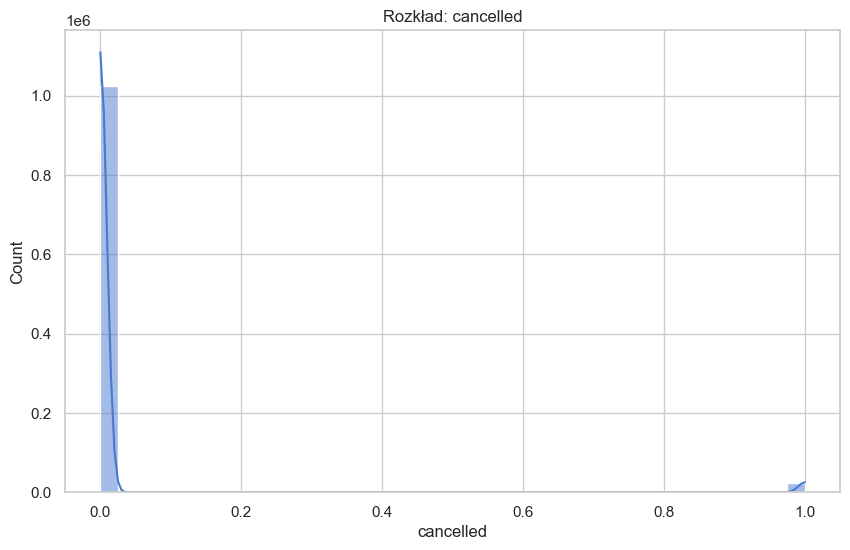

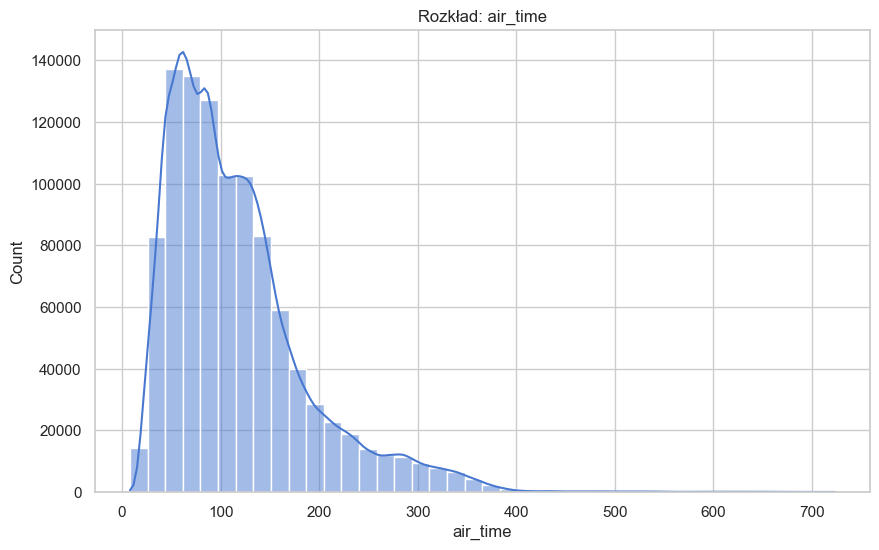

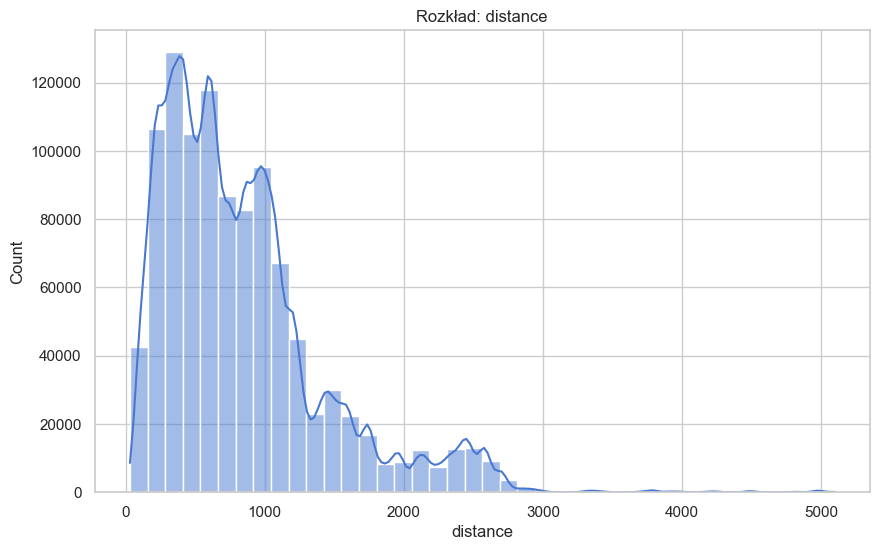

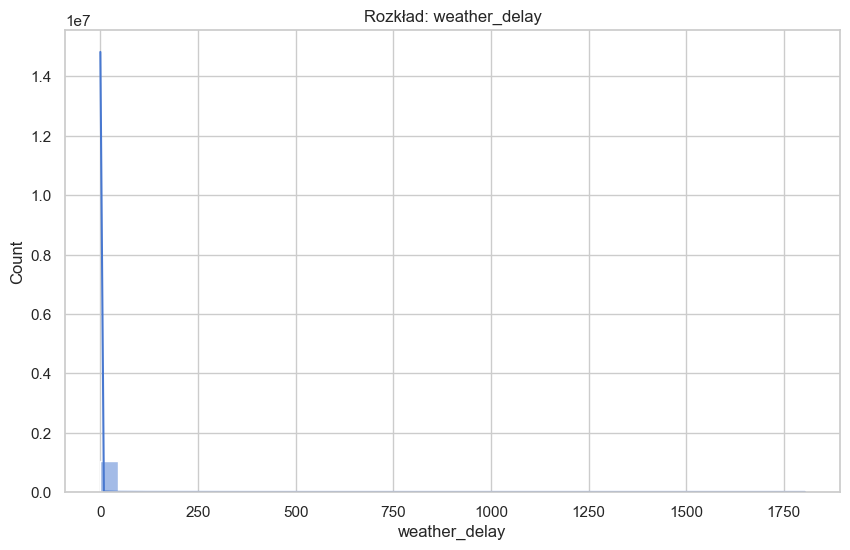

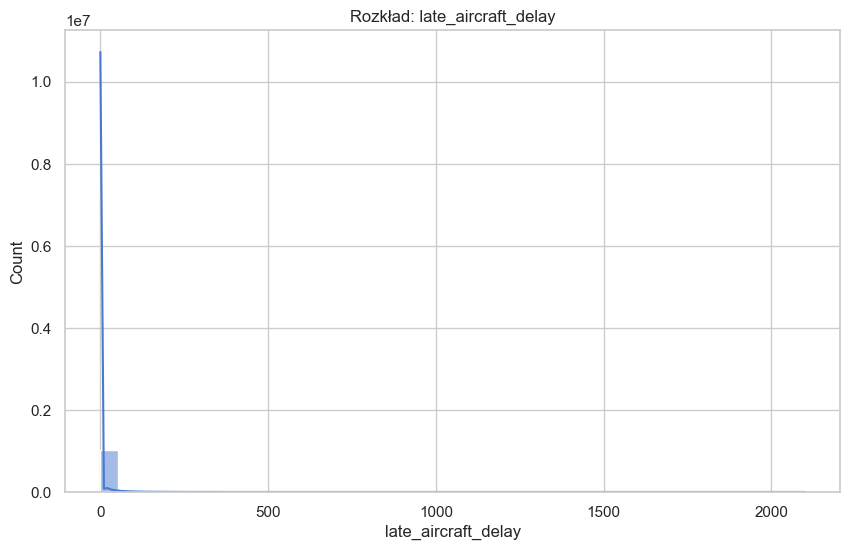

In [11]:
# Histogramy
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True, bins=40)
    plt.title(f"Rozkład: {col}")
    plt.savefig(f"../docs/hist_{col}.png", bbox_inches="tight")
    plt.show()


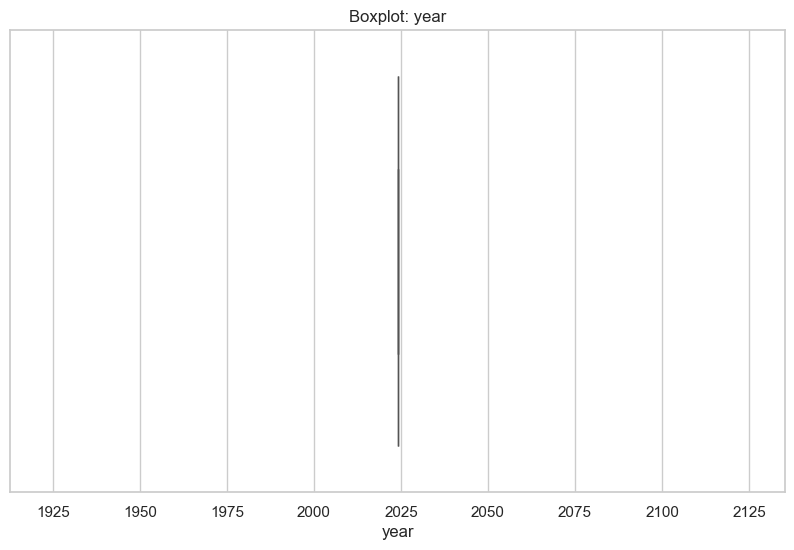

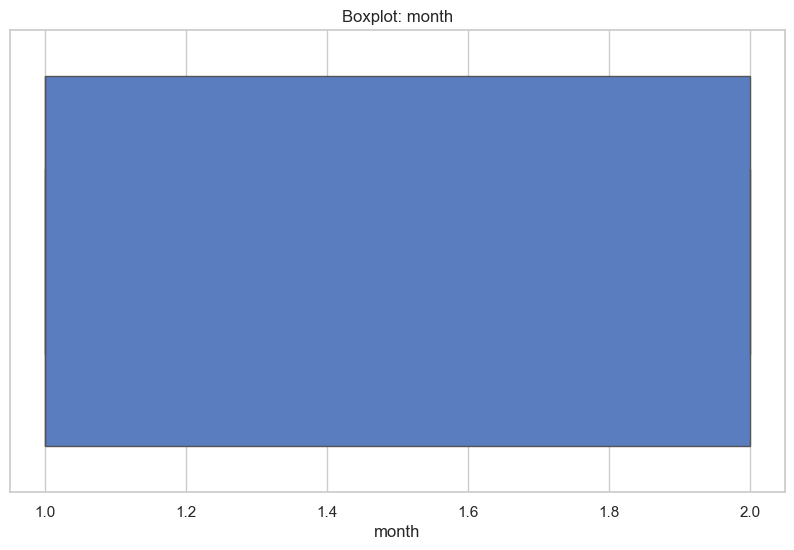

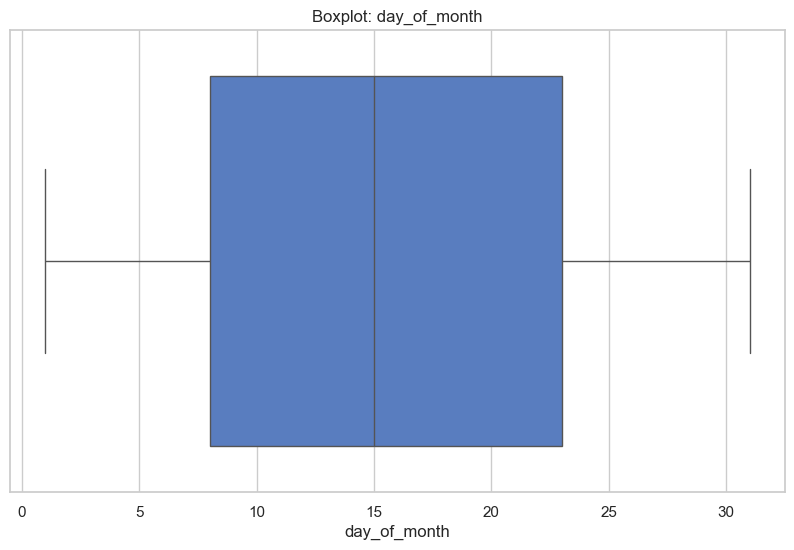

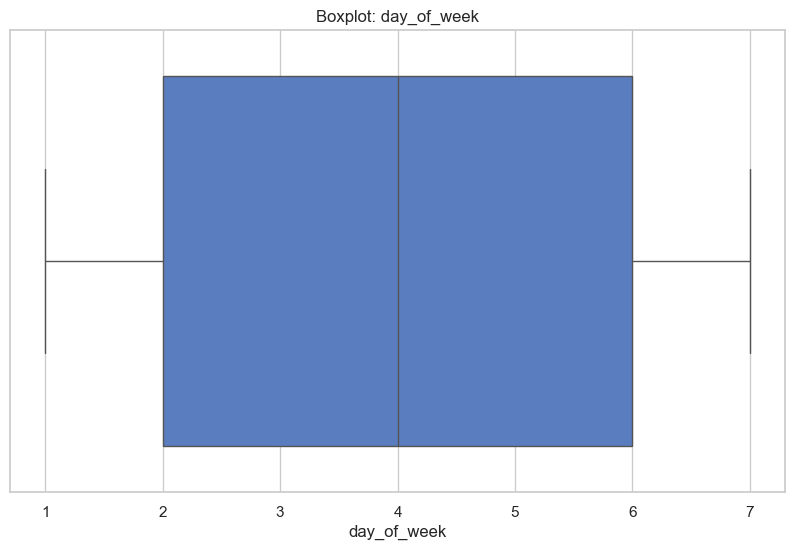

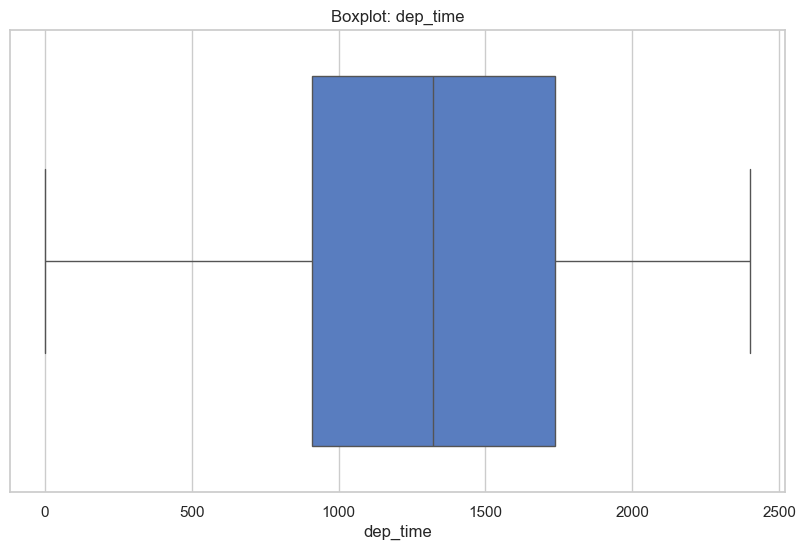

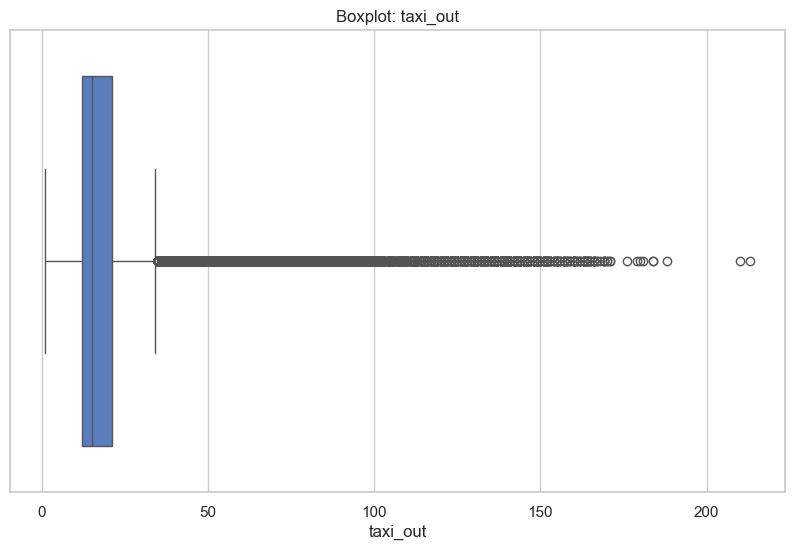

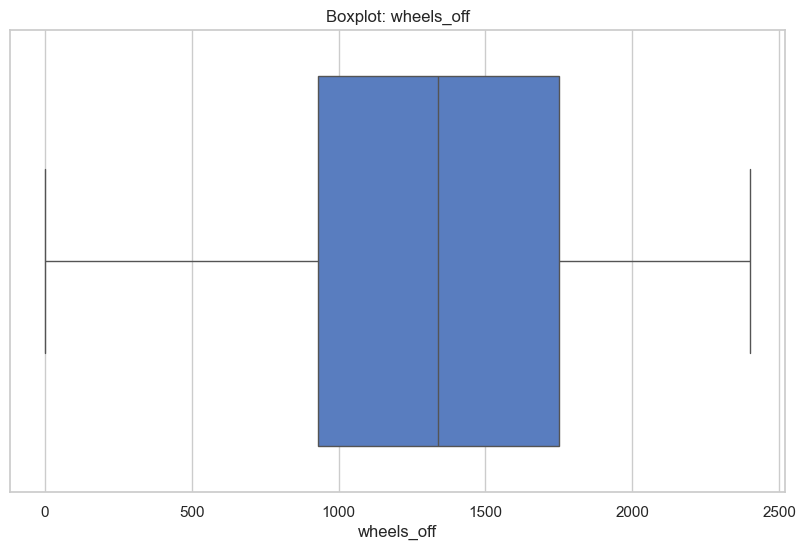

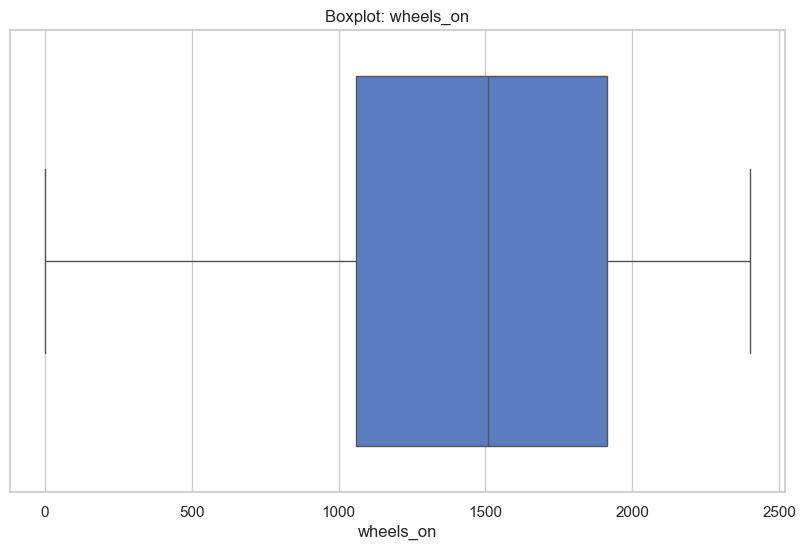

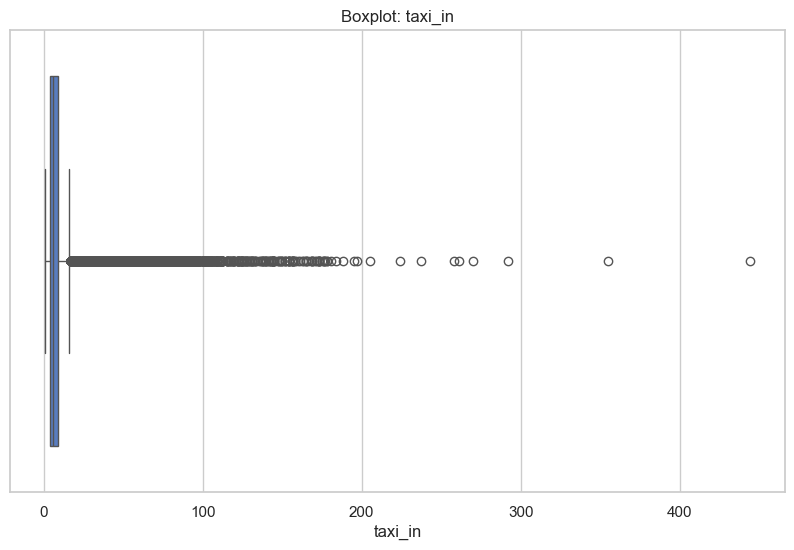

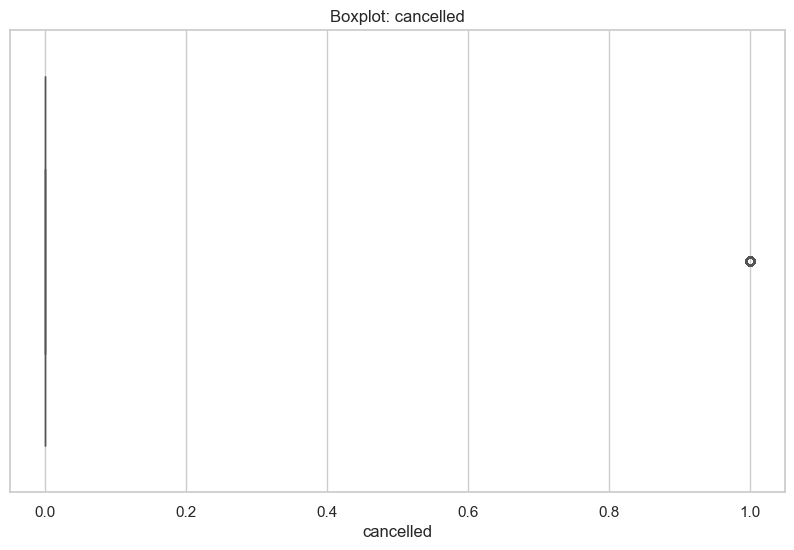

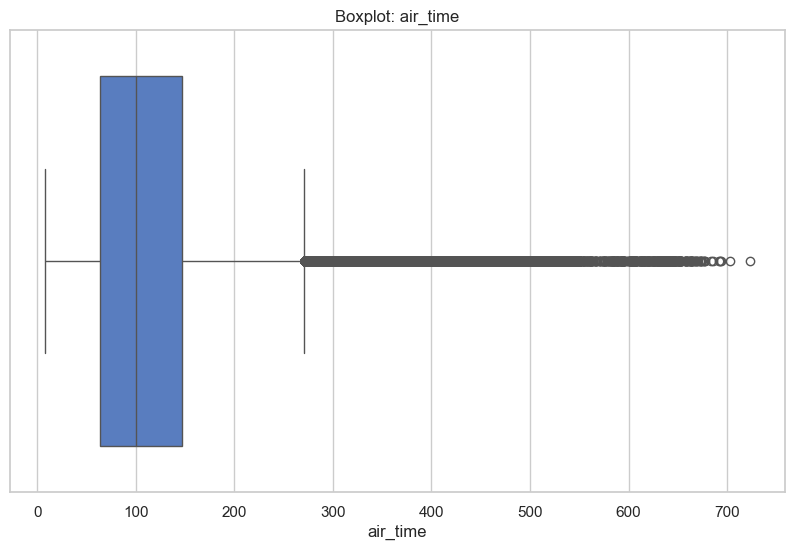

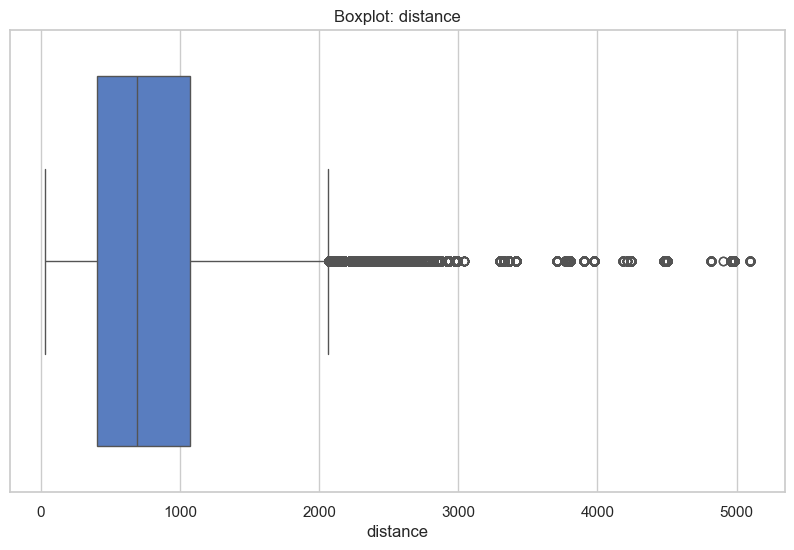

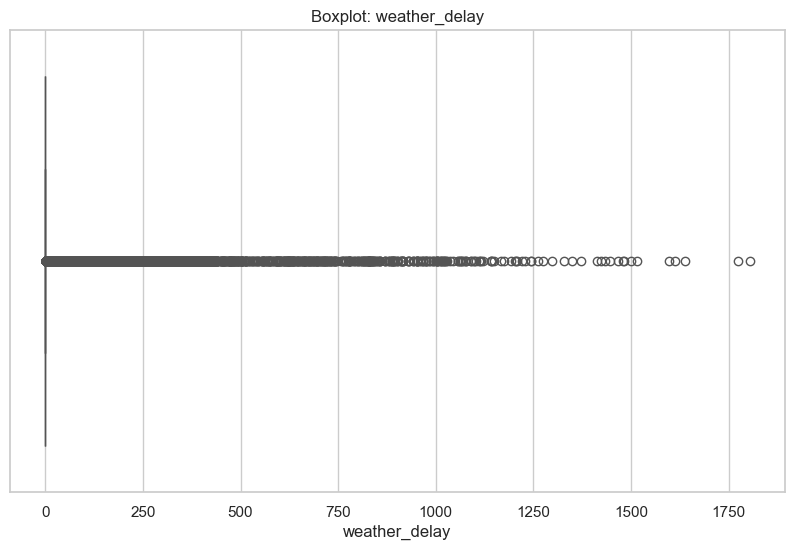

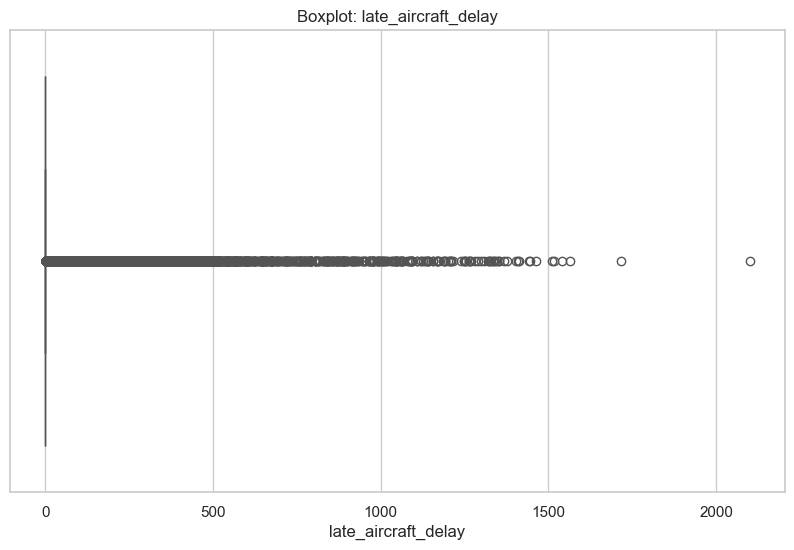

In [13]:
# Boxploty
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col].dropna())
    plt.title(f"Boxplot: {col}")
    plt.savefig(f"../docs/box_{col}.png", bbox_inches="tight")
    plt.show()


## Analiza zmiennych kategorycznych

In [14]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['fl_date', 'origin', 'origin_city_name', 'origin_state_nm'], dtype='object')

In [15]:
# Najczęstsze wartości
for col in cat_cols:
    print(f"\n{col}")
    print(df[col].value_counts(normalize=True).head(10))


fl_date
fl_date
2/23/2024    0.018287
2/16/2024    0.018275
2/22/2024    0.018236
2/25/2024    0.018228
2/26/2024    0.018223
2/19/2024    0.018213
2/15/2024    0.018132
1/2/2024     0.018098
1/7/2024     0.017941
1/26/2024    0.017841
Name: proportion, dtype: float64

origin
origin
ATL    0.047967
DFW    0.043412
DEN    0.042274
ORD    0.037364
CLT    0.030200
PHX    0.028308
LAX    0.027536
LAS    0.027172
MCO    0.026123
LGA    0.023832
Name: proportion, dtype: float64

origin_city_name
origin_city_name
Atlanta, GA              0.047967
Chicago, IL              0.047785
Dallas/Fort Worth, TX    0.043412
Denver, CO               0.042274
New York, NY             0.041416
Charlotte, NC            0.030200
Phoenix, AZ              0.029228
Washington, DC           0.028617
Los Angeles, CA          0.027536
Las Vegas, NV            0.027172
Name: proportion, dtype: float64

origin_state_nm
origin_state_nm
Texas             0.105437
California        0.104104
Florida           0.103090


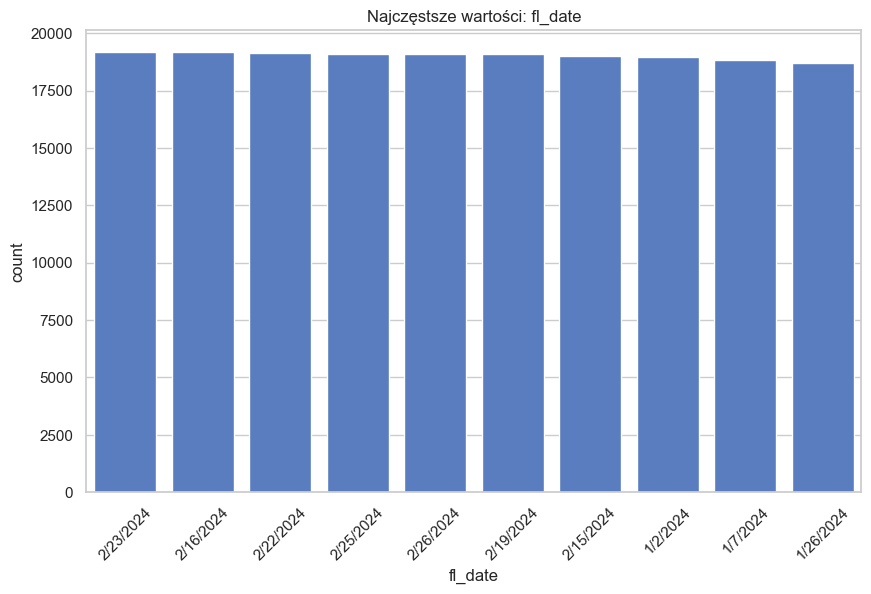

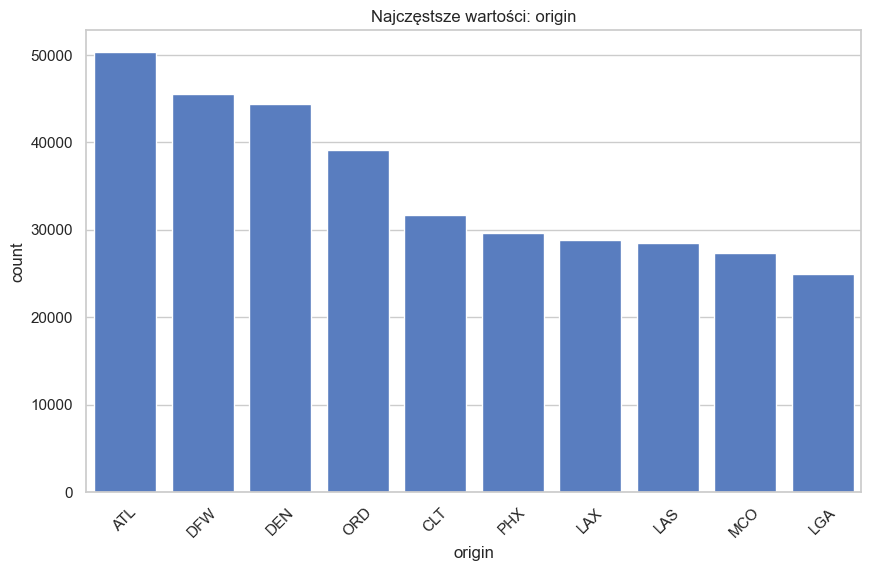

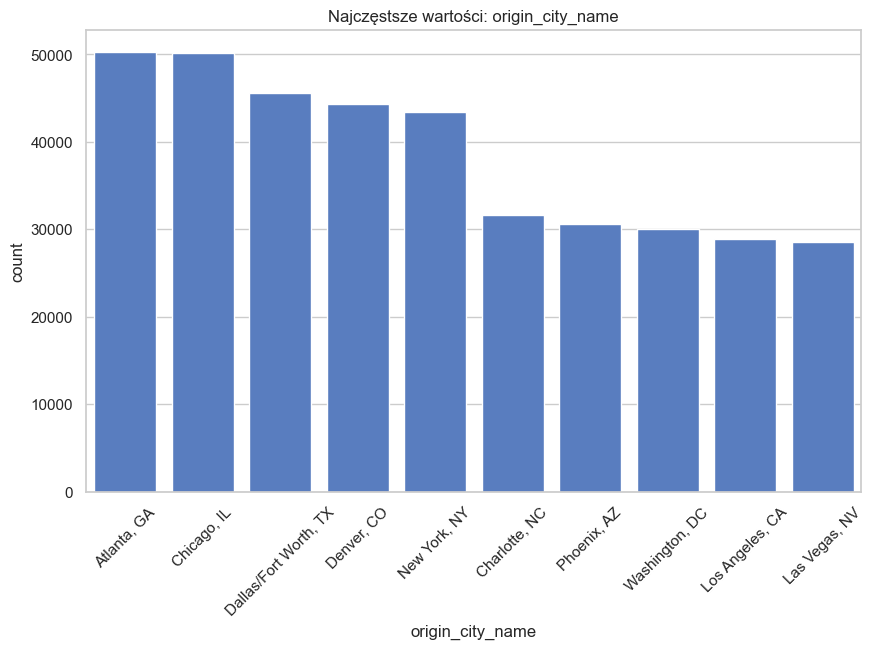

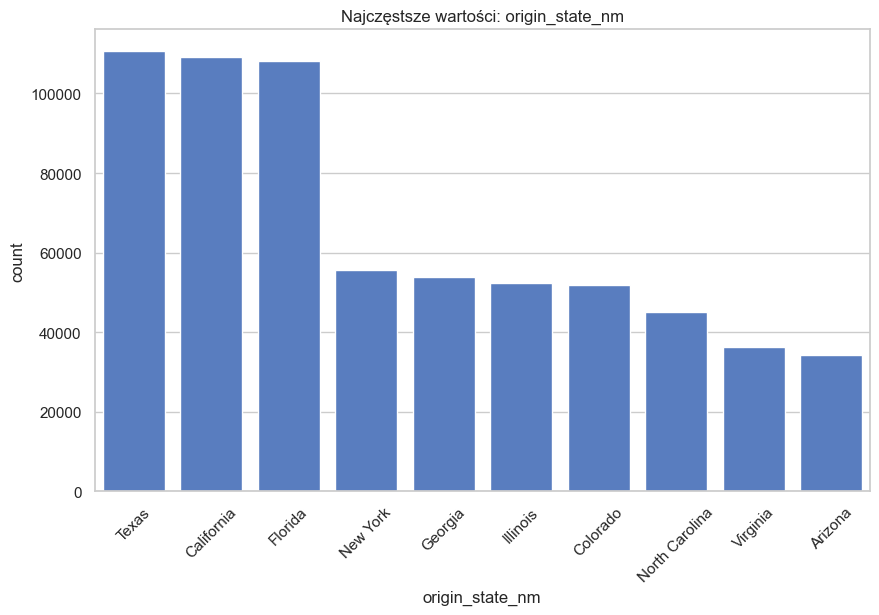

In [16]:
# Countploty
for col in cat_cols:
    plt.figure()
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.xticks(rotation=45)
    plt.title(f"Najczęstsze wartości: {col}")
    plt.savefig(f"../docs/count_{col}.png", bbox_inches="tight")
    plt.show()

## Korelacje i zaleznosci

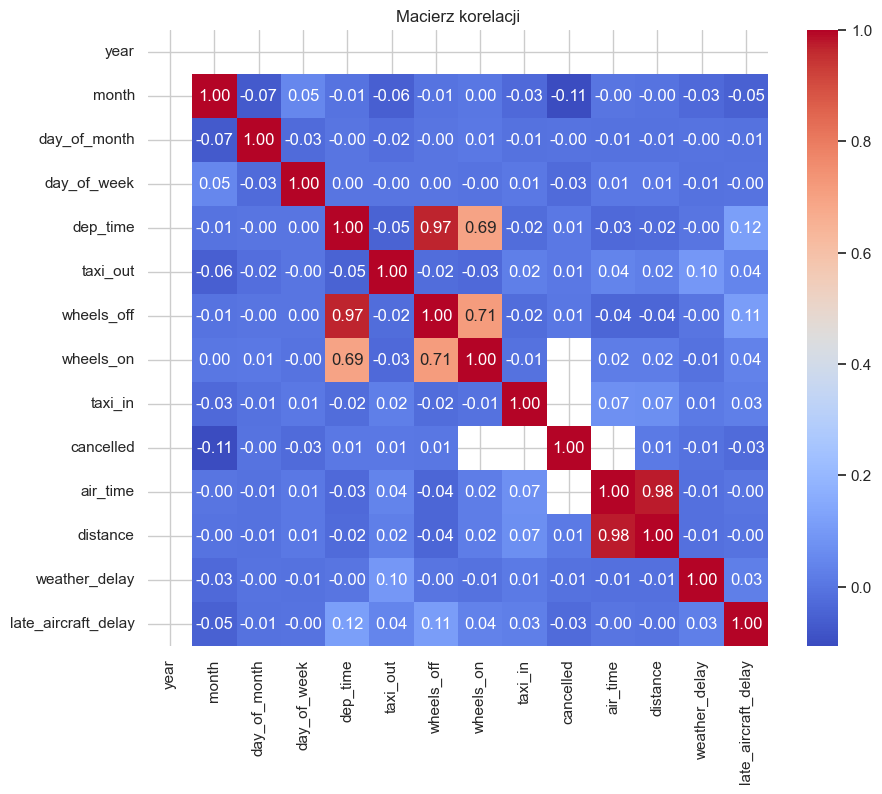

In [17]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Macierz korelacji")
plt.savefig("../docs/correlation_heatmap.png", bbox_inches="tight")
plt.show()


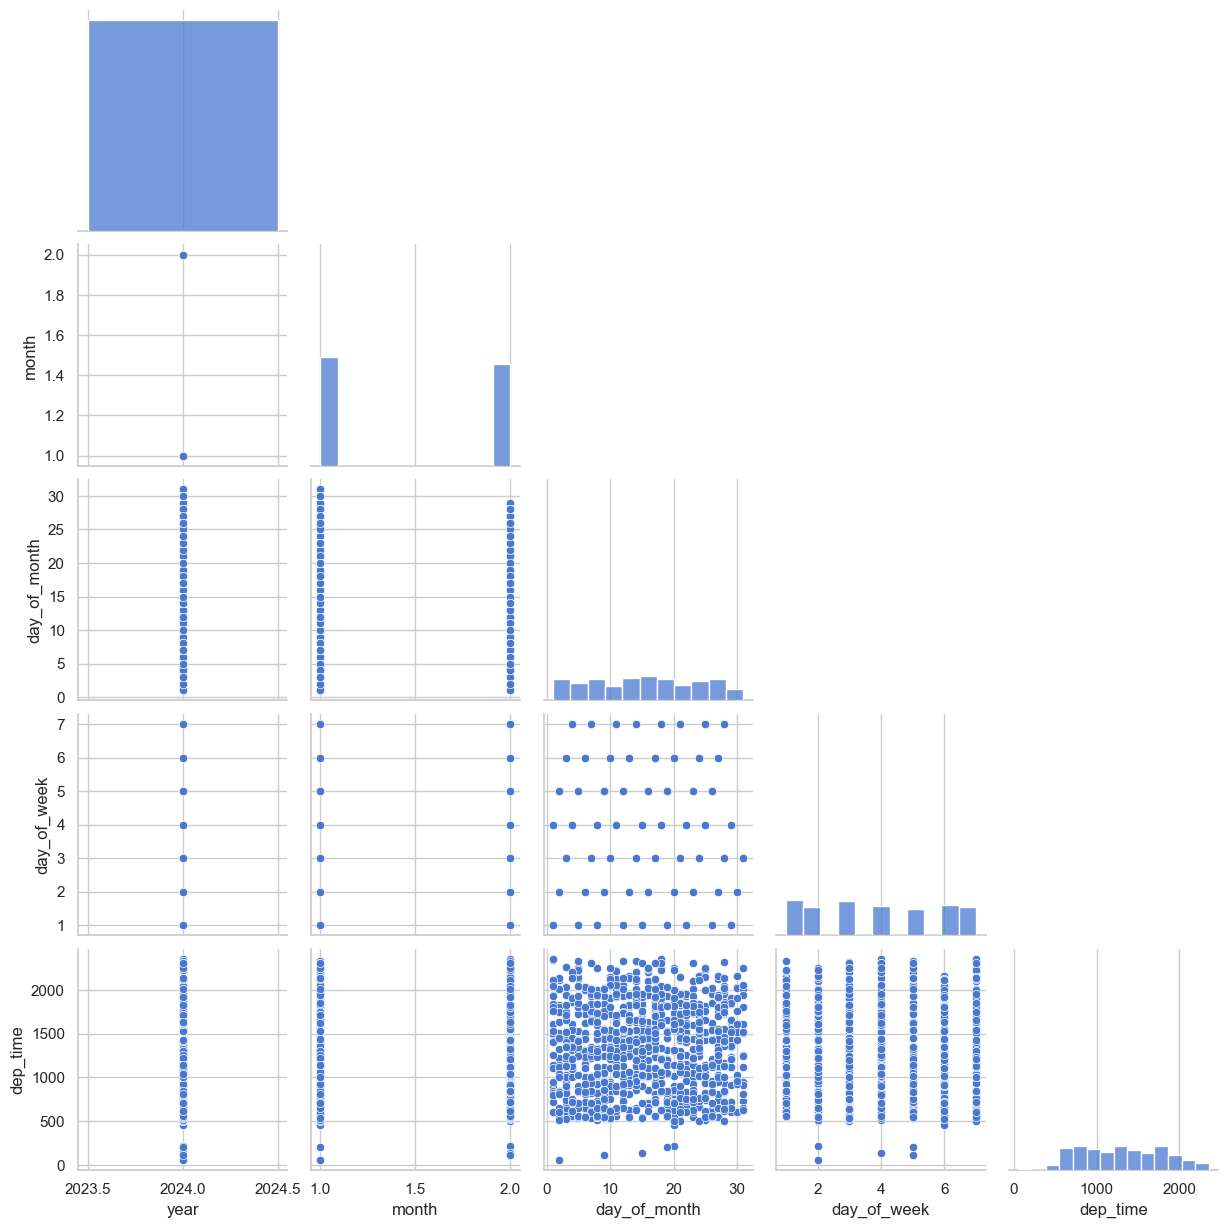

In [19]:
# Pairplot (dla próbki)
sample_df = df.sample(n=min(1000, len(df)), random_state=42)
sns.pairplot(sample_df[numeric_cols[:5]], corner=True)
plt.savefig("../docs/pairplot_sample.png", bbox_inches="tight")
plt.show()

## Duplikaty i wartości odstające

In [20]:
duplicates = df.duplicated().sum()
print(f"Liczba duplikatów: {duplicates}")

# Proste wykrywanie outlierów metodą IQR
outlier_summary = {}
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_summary[col] = ((df[col] < lower) | (df[col] > upper)).sum()

outlier_df = pd.Series(outlier_summary, name="outlier_count").sort_values(ascending=False)
outlier_df.head(10)


Liczba duplikatów: 7401


late_aircraft_delay    99038
taxi_in                70946
taxi_out               61576
distance               61285
air_time               48052
cancelled              23306
weather_delay          15895
year                       0
month                      0
day_of_month               0
Name: outlier_count, dtype: int64

# Wnioski po analizie EDA

## Struktura danych
- Dane zawierają około **1 miliona rekordów**.
- Typy danych są głównie liczbowe (czasy, opóźnienia) oraz kilka kolumn kategorycznych (`origin`, `origin_city_name`).

## Braki danych
- Braki występują głównie w kolumnach czasowych (`air_time`, `dep_time`, `wheels_on`), co może wynikać z odwołanych lotów.
- Należy rozważyć imputację lub filtrowanie danych z `cancelled == 1`.

## Wartości odstające
- Wartości odstające wykryto w kolumnach:  
  **`late_aircraft_delay`**, **`taxi_in`**, **`taxi_out`**, **`distance`**, **`air_time`**, **`cancelled`** oraz **`weather_delay`**.  
- Wysokie wartości w `late_aircraft_delay` i `weather_delay` sugerują sporadyczne, ale znaczące opóźnienia związane z pogodą i rotacją samolotu.  
- Zmienna `cancelled` jest binarna, więc wartości odstające mogą wynikać z kodowania (0/1) – nie stanowią błędu.  
- Duże rozrzuty w `taxi_in`, `taxi_out` i `air_time` mogą wynikać z różnic w wielkości lotnisk lub długości tras.  
- Dystans (`distance`) ma również długi ogon — występują zarówno bardzo krótkie, jak i bardzo długie loty, co należy uwzględnić przy skalowaniu danych.

## Korelacje
- **0.97** między `wheels_off` i `dep_time` — bardzo silna zależność między czasem startu a momentem oderwania się samolotu od pasa (naturalna relacja czasowa).  
- **0.69** między `wheels_on` i `dep_time` — wskazuje, że wcześniejszy odlot wiąże się zwykle z wcześniejszym lądowaniem.  
- **0.71** między `wheels_on` i `wheels_off` — zgodna z oczekiwaniem, odzwierciedla długość lotu.  
- **0.98** między `distance` i `air_time` — potwierdza, że czas lotu jest silnie zależny od długości trasy (relacja niemal liniowa).  

Te silne korelacje sugerują, że niektóre zmienne mogą być redundantne — przy modelowaniu warto rozważyć ich usunięcie lub zastąpienie zmienną pochodną (np. prędkością przelotową = distance / air_time).


## Dalsze kroki
- Konwersja kolumn czasowych na typ `datetime` i utworzenie zmiennych pochodnych (np. godzina odlotu, dzień tygodnia).  
- Usunięcie lub przekształcenie zmiennych o silnej korelacji, by uniknąć wielokolinearności w modelach liniowych.  
- Dalsza analiza rozkładów `weather_delay` i `late_aircraft_delay` — mogą wymagać transformacji logarytmicznej.  
- Ujednolicenie jednostek czasu i rozważenie filtrowania rekordów odwołanych (`cancelled == 1`) w oddzielnej analizie.
